## Titanic 데이터 셋으로 요약 보고서 작성

In [66]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

t = sns.load_dataset("titanic")
t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### DataFrame의 행열크기 확인 : shape

In [51]:
print(t.shape)

(891, 15)


### DataFrame의 모든 기본 정보 확인 : info()

In [52]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 상위 7개 데이터 내용 보기 : head(7)

In [53]:
t.head(7)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


### column 확인

In [54]:
print(t.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


### 남성과 여성의 인원수 합 : count()

In [55]:
male_cnt = 0
female_cnt = 0
for i in range(len(t)) :
    if t.loc[[i], ["sex"]].values == "male" :
        male_cnt += 1
    elif t.loc[[i], ["sex"]].values == "female" :
        female_cnt += 1
print("male :", male_cnt)
print("female :", female_cnt)
print("총 인원수 :", t["sex"].count())

male : 577
female : 314
총 인원수 : 891


### 남성과 여성의 인원수 확인 : value_counts()

In [56]:
t["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

### 탑승자의 나이 평균

In [57]:
print(t["age"].mean())

29.69911764705882


### survived, pclass 열의 행 확인

In [58]:
t[["survived", "pclass"]]

,survived,pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


### 기초통계량 확인 : describe()

In [59]:
t.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 문자형 기초통계량 확인 : describe(include = "O")

In [60]:
t.describe(include = "O")

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


### embark_town별 총 인원 확인 : value_counts()

In [61]:
t["embark_town"].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

### pclass별 등급 개수 확인 : value_counts()

In [62]:
t["pclass"].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [63]:
# 상위 7개 데이터 확인
t.head(7)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


### Group fare column 추가
* histogram 확인

(223, 16)
(224, 16)
(222, 16)
(222, 16)


Text(0.5, 1.0, 'group fare 04')

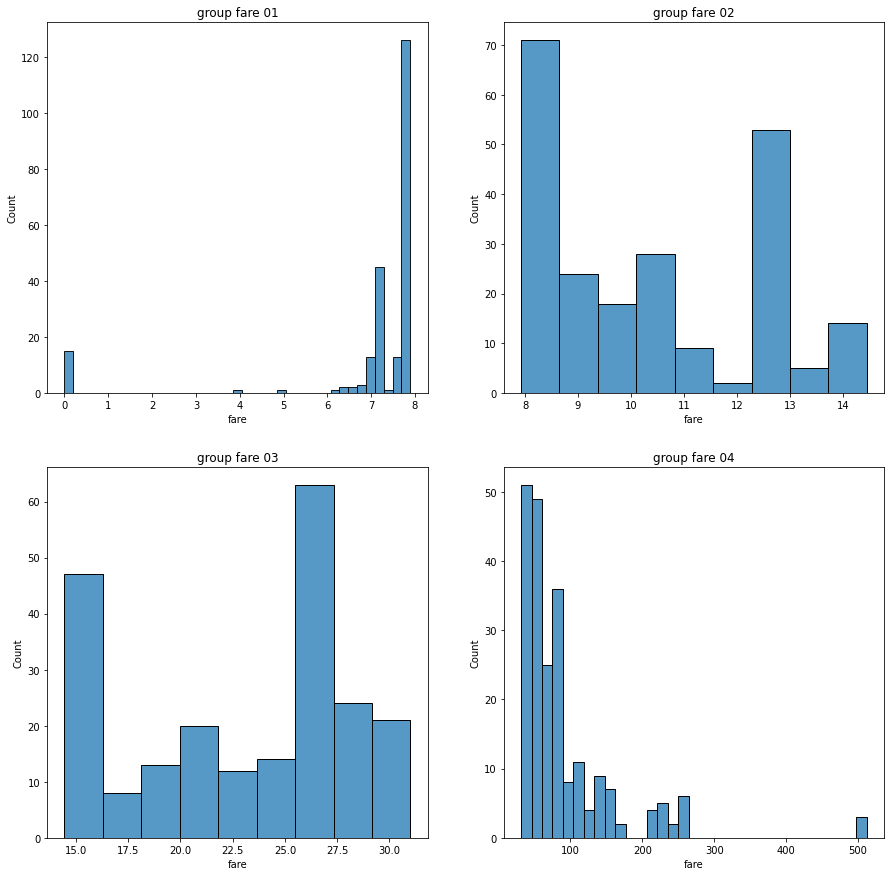

In [68]:
t_fare01 = t.loc[(t.fare >= 0) & (t.fare <= 7.9104), :]
t_fare02 = t.loc[(t.fare > 7.9104) & (t.fare <= 14.4542), :]
t_fare03 = t.loc[(t.fare > 14.4542) & (t.fare <= 31), :]
t_fare04 = t.loc[(t["fare"] > 31) & (t.fare <= 513), :]

print(t_fare01.shape)
print(t_fare02.shape)
print(t_fare03.shape)
print(t_fare04.shape)

t.loc[(t.fare >= 0) & (t.fare <= 7.9104), "group_fare"] = 1
t.loc[(t.fare > 7.9104) & (t.fare <= 14.4542), "group_fare"] = 2
t.loc[(t.fare > 14.4542) & (t.fare <= 31), "group_fare"] = 3
t.loc[(t["fare"] > 31) & (t.fare <= 513), "group_fare"] = 4

grp_fare01 = t[t["group_fare"] == 1]
grp_fare02 = t[t["group_fare"] == 2]
grp_fare03 = t[t["group_fare"] == 3]
grp_fare04 = t[t["group_fare"] == 4]

plt.figure(figsize = (15, 15))
plt.subplot(2, 2, 1)
sns.histplot(x = "fare", data = grp_fare01)
plt.title("group fare 01")

plt.subplot(2, 2, 2)
sns.histplot(x = "fare", data = grp_fare02)
plt.title("group fare 02")

plt.subplot(2, 2, 3)
sns.histplot(x = "fare", data = grp_fare03)
plt.title("group fare 03")

plt.subplot(2, 2, 4)
sns.histplot(x = "fare", data = grp_fare04)
plt.title("group fare 04")

### Group age column 추가
* histogram 확인

Text(0.5, 1.0, 'age group 9 histogram')

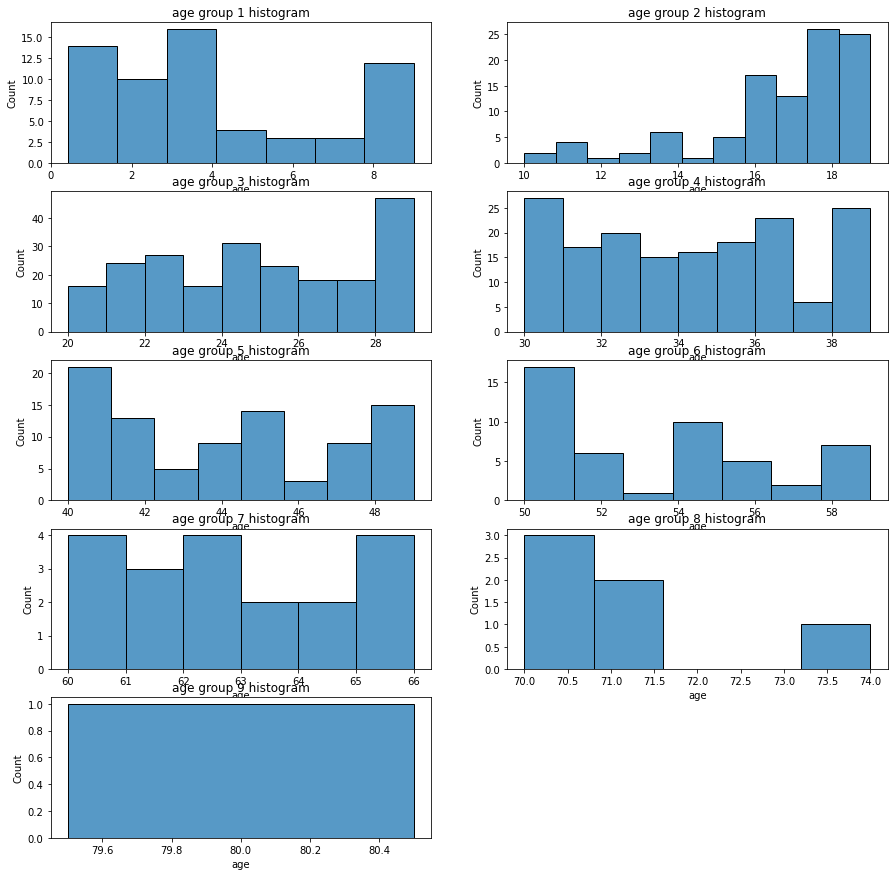

In [71]:
t.loc[(t.age >= 0) & (t.age < 10), "group_age"] = 0
t.loc[(t.age >= 10) & (t.age < 20), "group_age"] = 10
t.loc[(t.age >= 20) & (t.age <30), "group_age"] = 20
t.loc[(t.age >= 30) & (t.age <40), "group_age"] = 30
t.loc[(t.age >= 40) & (t.age <50), "group_age"] = 40
t.loc[(t.age >= 50) & (t.age <60), "group_age"] = 50
t.loc[(t.age >= 60) & (t.age <70), "group_age"] = 60
t.loc[(t.age >= 70) & (t.age <80), "group_age"] = 70
t.loc[(t.age >= 80) & (t.age <90), "group_age"] = 80

grp_age01 = t[t["group_age"] == 0]
grp_age02 = t[t["group_age"] == 10]
grp_age03 = t[t["group_age"] == 20]
grp_age04 = t[t["group_age"] == 30]
grp_age05 = t[t["group_age"] == 40]
grp_age06 = t[t["group_age"] == 50]
grp_age07 = t[t["group_age"] == 60]
grp_age08 = t[t["group_age"] == 70]
grp_age09 = t[t["group_age"] == 80]

plt.figure(figsize = (15, 15))

plt.subplot(5, 2, 1)
sns.histplot(x = "age", data = grp_age01)
plt.title("age group 1 histogram")

plt.subplot(5, 2, 2)
sns.histplot(x = "age", data = grp_age02)
plt.title("age group 2 histogram")

plt.subplot(5, 2, 3)
sns.histplot(x = "age", data = grp_age03)
plt.title("age group 3 histogram")

plt.subplot(5, 2, 4)
sns.histplot(x = "age", data = grp_age04)
plt.title("age group 4 histogram")

plt.subplot(5, 2, 5)
sns.histplot(x = "age", data = grp_age05)
plt.title("age group 5 histogram")

plt.subplot(5, 2, 6)
sns.histplot(x = "age", data = grp_age06)
plt.title("age group 6 histogram")

plt.subplot(5, 2, 7)
sns.histplot(x = "age", data = grp_age07)
plt.title("age group 7 histogram")

plt.subplot(5, 2, 8)
sns.histplot(x = "age", data = grp_age08)
plt.title("age group 8 histogram")

plt.subplot(5, 2, 9)
sns.histplot(x = "age", data = grp_age09)
plt.title("age group 9 histogram")

## Group별 통계

### group_fare별 합 : sum( )

In [73]:
t.groupby(["group_fare"]).sum()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,group_age
group_fare,,,,,,,,,
1.0,44,651,4051.00,12,5,1568.6203,179,210,3410.0
2.0,68,586,5797.92,33,22,2326.4752,153,187,4940.0
3.0,101,494,5148.33,167,136,5112.3662,111,76,4350.0
4.0,129,326,6207.92,254,177,19686.4876,94,64,5330.0


### group_fare별 평균 : mean( )

In [74]:
t.groupby(["group_fare"]).mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,group_age
group_fare,,,,,,,,,
1.0,0.197309,2.919283,28.328671,0.053812,0.022422,7.034172,0.802691,0.941704,23.846154
2.0,0.303571,2.616071,28.989600,0.147321,0.098214,10.386050,0.683036,0.834821,24.700000
3.0,0.454955,2.225225,29.086610,0.752252,0.612613,23.028677,0.500000,0.342342,24.576271
4.0,0.581081,1.468468,31.999588,1.144144,0.797297,88.677872,0.423423,0.288288,27.474227


### gourp_fare별 중간값 : median( )

In [75]:
t.groupby(["group_fare"]).median()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,group_age
group_fare,,,,,,,,,
1.0,0.0,3.0,25.0,0.0,0.0,7.75000,1.0,1.0,20.0
2.0,0.0,3.0,28.0,0.0,0.0,9.84375,1.0,1.0,20.0
3.0,0.0,2.0,30.0,1.0,0.0,25.46670,0.5,0.0,30.0
4.0,1.0,1.0,31.5,1.0,0.0,69.55000,0.0,0.0,30.0


### group_fare별 개수 : count( )

In [76]:
t.groupby(["group_fare"]).count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,group_age
group_fare,,,,,,,,,,,,,,,,
1.0,223,223,223,143,223,223,223,223,223,223,223,8,223,223,223,143
2.0,224,224,224,200,224,224,224,224,224,224,224,16,224,224,224,200
3.0,222,222,222,177,222,222,222,222,222,222,222,41,222,222,222,177
4.0,222,222,222,194,222,222,222,220,222,222,222,138,220,222,222,194


### group_fare별 pclass, sex, age, fare의 개수 : count( )

In [77]:
sel = ['pclass', 'sex', 'age', 'fare', 'group_fare']
t[sel].groupby(["group_fare"]).count()

,pclass,sex,age,fare
group_fare,,,,
1.0,223,223,143,223
2.0,224,224,200,224
3.0,222,222,177,222
4.0,222,222,194,222


### sex, pclass별 count 수

In [78]:
t.groupby(["sex", "pclass"]).count()

survived  age  sibsp  parch  fare  embarked  class  who  \
sex    pclass                                                            
female 1             94   85     94     94    94        92     94   94   
       2             76   74     76     76    76        76     76   76   
       3            144  102    144    144   144       144    144  144   
male   1            122  101    122    122   122       122    122  122   
       2            108   99    108    108   108       108    108  108   
       3            347  253    347    347   347       347    347  347   

               adult_male  deck  embark_town  alive  alone  group_fare  \
sex    pclass                                                            
female 1               94    81           92     94     94          94   
       2               76    10           76     76     76          76   
       3              144     6          144    144    144         144   
male   1              122    94          122    122    122         122   
       2              108     6          108    108    108         108   
       3              347     6          347    347    347         347   

               group_age  
sex    pclass             
female 1              85  
       2              74  
       3             102  
male   1             101  
       2              99  
       3             253

### sex, pclass, embarked별 count 수

In [79]:
t.groupby(["sex", "pclass", "embarked"]).count()

survived  age  sibsp  parch  fare  class  who  \
sex    pclass embarked                                                  
female 1      C               43   38     43     43    43     43   43   
              Q                1    1      1      1     1      1    1   
              S               48   44     48     48    48     48   48   
       2      C                7    7      7      7     7      7    7   
              Q                2    1      2      2     2      2    2   
              S               67   66     67     67    67     67   67   
       3      C               23   16     23     23    23     23   23   
              Q               33   10     33     33    33     33   33   
              S               88   76     88     88    88     88   88   
male   1      C               42   36     42     42    42     42   42   
              Q                1    1      1      1     1      1    1   
              S               79   64     79     79    79     79   79   
       2      C               10    8     10     10    10     10   10   
              Q                1    1      1      1     1      1    1   
              S               97   90     97     97    97     97   97   
       3      C               43   25     43     43    43     43   43   
              Q               39   14     39     39    39     39   39   
              S              265  214    265    265   265    265  265   

                        adult_male  deck  embark_town  alive  alone  \
sex    pclass embarked                                                
female 1      C                 43    35           43     43     43   
              Q                  1     1            1      1      1   
              S                 48    43           48     48     48   
       2      C                  7     1            7      7      7   
              Q                  2     1            2      2      2   
              S                 67     8           67     67     67   
       3      C                 23     1           23     23     23   
              Q                 33     0           33     33     33   
              S                 88     5           88     88     88   
male   1      C                 42    31           42     42     42   
              Q                  1     1            1      1      1   
              S                 79    62           79     79     79   
       2      C                 10     1           10     10     10   
              Q                  1     0            1      1      1   
              S                 97     5           97     97     97   
       3      C                 43     0           43     43     43   
              Q                 39     1           39     39     39   
              S                265     5          265    265    265   

                        group_fare  group_age  
sex    pclass embarked                         
female 1      C                 43         38  
              Q                  1          1  
              S                 48         44  
       2      C                  7          7  
              Q                  2          1  
              S                 67         66  
       3      C                 23         16  
              Q                 33         10  
              S                 88         76  
male   1      C                 42         36  
              Q                  1          1  
              S                 79         64  
       2      C                 10          8  
              Q                  1          1  
              S                 97         90  
       3      C                 43         25  
              Q                 39         14  
              S                265        214

### sex, pclass, embarked, group_age별 count 수 

In [80]:
t.groupby(["sex", "pclass", 'embarked', 'group_age']).count()

survived  age  sibsp  parch  fare  class  \
sex    pclass embarked group_age                                             
female 1      C        10.0              5    5      5      5     5      5   
                       20.0              7    7      7      7     7      7   
                       30.0             11   11     11     11    11     11   
                       40.0              7    7      7      7     7      7   
                       50.0              7    7      7      7     7      7   
...                                    ...  ...    ...    ...   ...    ...   
male   3      S        30.0             45   45     45     45    45     45   
                       40.0             21   21     21     21    21     21   
                       50.0              6    6      6      6     6      6   
                       60.0              1    1      1      1     1      1   
                       70.0              1    1      1      1     1      1   

                                  who  adult_male  deck  embark_town  alive  \
sex    pclass embarked group_age                                              
female 1      C        10.0         5           5     5            5      5   
                       20.0         7           7     7            7      7   
                       30.0        11          11     8           11     11   
                       40.0         7           7     6            7      7   
                       50.0         7           7     6            7      7   
...                               ...         ...   ...          ...    ...   
male   3      S        30.0        45          45     1           45     45   
                       40.0        21          21     1           21     21   
                       50.0         6           6     0            6      6   
                       60.0         1           1     0            1      1   
                       70.0         1           1     0            1      1   

                                  alone  group_fare  
sex    pclass embarked group_age                     
female 1      C        10.0           5           5  
                       20.0           7           7  
                       30.0          11          11  
                       40.0           7           7  
                       50.0           7           7  
...                                 ...         ...  
male   3      S        30.0          45          45  
                       40.0          21          21  
                       50.0           6           6  
                       60.0           1           1  
                       70.0           1           1  

[86 rows x 13 columns]